## Install tools

In [2]:
# !pip install -U ydata-profiling Yellowbrick shap ipywidgets imblearn lime

## 1) Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from ydata_profiling import ProfileReport
from yellowbrick.classifier import ClassificationReport
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.inspection import PartialDependenceDisplay
from imblearn.combine import SMOTEENN

In [4]:
for x in range(-5,0):
    print(x)

-5
-4
-3
-2
-1


In [ ]:
def FirstFactorial(num):
    for x in range(-int(num),0):
        x *= x
        num += x
    return num

# keep this function call here 
print(FirstFactorial(input()))

In [4]:
%matplotlib inline

## 2) Data exploration - EDA

In [5]:
data = pd.read_csv(r"C:\Users\gabri\Documents\Machine Learning\DataSets\churn-A3data.csv")
data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7569-NMZYQ  Female              0     Yes        Yes      72   
1     8984-HPEMB  Female              0      No         No      71   
2     5989-AXPUC  Female              0     Yes         No      68   
3     5734-EJKXG  Female              0      No         No      61   
4     8199-ZLLSA    Male              0      No         No      67   
...          ...     ...            ...     ...        ...     ...   
7038  0621-CXBKL  Female              0      No         No      53   
7039  9945-PSVIP  Female              0     Yes        Yes      25   
7040  0827-ITJPH    Male              0      No         No      36   
7041  9764-REAFF  Female              0     Yes         No      59   
7042  6823-SIDFQ    Male              0      No         No      28   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
0             Yes           Yes     Fiber optic                  Yes  ...   
1             Yes           Yes     Fiber optic                  Yes  ...   
2             Yes           Yes     Fiber optic                  Yes  ...   
3             Yes           Yes     Fiber optic                  Yes  ...   
4             Yes           Yes     Fiber optic                  Yes  ...   
...           ...           ...             ...                  ...  ...   
7038          Yes            No              No  No internet service  ...   
7039          Yes            No              No  No internet service  ...   
7040          Yes            No              No  No internet service  ...   
7041          Yes            No              No  No internet service  ...   
7042          Yes            No              No  No internet service  ...   

         DeviceProtection          TechSupport          StreamingTV  \
0                     Yes                  Yes                  Yes   
1                     Yes                  Yes                  Yes   
2                     Yes                  Yes                  Yes   
3                     Yes                  Yes                  Yes   
4                     Yes                  Yes                  Yes   
...                   ...                  ...                  ...   
7038  No internet service  No internet service  No internet service   
7039  No internet service  No internet service  No internet service   
7040  No internet service  No internet service  No internet service   
7041  No internet service  No internet service  No internet service   
7042  No internet service  No internet service  No internet service   

          StreamingMovies  Contract PaperlessBilling  \
0                     Yes  Two year              Yes   
1                     Yes  Two year              Yes   
2                     Yes  Two year               No   
3                     Yes  One year              Yes   
4                     Yes  One year              Yes   
...                   ...       ...              ...   
7038  No internet service  Two year               No   
7039  No internet service  Two year              Yes   
7040  No internet service  Two year              Yes   
7041  No internet service  Two year               No   
7042  No internet service  One year               No   

                  PaymentMethod MonthlyCharges TotalCharges Churn  
0     Bank transfer (automatic)         118,75      8672,45    No  
1              Electronic check         118,65       8477,6    No  
2                  Mailed check          118,6      7990,05    No  
3              Electronic check          118,6       7365,7    No  
4     Bank transfer (automatic)         118,35      7804,15   Yes  
...                         ...            ...          ...   ...  
7038               Mailed check           18,7       1005,7    No  
7039               Mailed check           18,7       383,65    No  
7040    Credit card (automatic)          18,55          689    No  
7041  Bank transfer (automatic)   

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [7]:
data["TotalCharges"].isnull().sum()

np.int64(11)

In [8]:
profile = ProfileReport(data, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 21/21 [00:00<00:00, 35.60it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

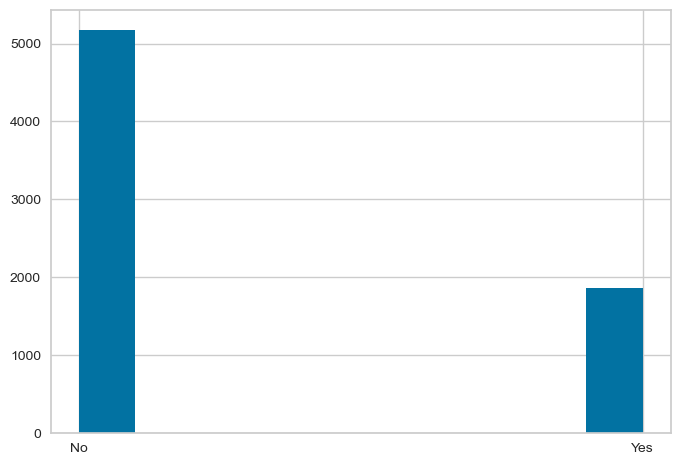

In [10]:
plt.hist(data["Churn"],bins=10)
plt.show()

In [11]:
data['Contract'].unique()

array(['Two year', 'One year', 'Month-to-month'], dtype=object)

In [12]:
data.describe(include=['O'])

customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7569-NMZYQ   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq          3473        2810            2785            3875   

       PaperlessBilling     PaymentMethod MonthlyCharges TotalCharges Churn  
count              7043              7043           7043         7032  7043  
unique                2                 4           1585         6530     2  
top                 Yes  Electronic check          20,05         20,2    No  
freq               4171              2365             61           11  5174

## 3) Data pre-processing

In [13]:
df2 = data.copy()
df2['TotalCharges'] = df2['TotalCharges'].str.replace(',', '.', regex=False)
df2['MonthlyCharges'] = df2['MonthlyCharges'].str.replace(',', '.', regex=False)

df2['MonthlyCharges'] = pd.to_numeric(df2['MonthlyCharges'], errors= 'coerce')
df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'], errors= 'coerce')

In [14]:
df2

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7569-NMZYQ  Female              0     Yes        Yes      72   
1     8984-HPEMB  Female              0      No         No      71   
2     5989-AXPUC  Female              0     Yes         No      68   
3     5734-EJKXG  Female              0      No         No      61   
4     8199-ZLLSA    Male              0      No         No      67   
...          ...     ...            ...     ...        ...     ...   
7038  0621-CXBKL  Female              0      No         No      53   
7039  9945-PSVIP  Female              0     Yes        Yes      25   
7040  0827-ITJPH    Male              0      No         No      36   
7041  9764-REAFF  Female              0     Yes         No      59   
7042  6823-SIDFQ    Male              0      No         No      28   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
0             Yes           Yes     Fiber optic                  Yes  ...   
1             Yes           Yes     Fiber optic                  Yes  ...   
2             Yes           Yes     Fiber optic                  Yes  ...   
3             Yes           Yes     Fiber optic                  Yes  ...   
4             Yes           Yes     Fiber optic                  Yes  ...   
...           ...           ...             ...                  ...  ...   
7038          Yes            No              No  No internet service  ...   
7039          Yes            No              No  No internet service  ...   
7040          Yes            No              No  No internet service  ...   
7041          Yes            No              No  No internet service  ...   
7042          Yes            No              No  No internet service  ...   

         DeviceProtection          TechSupport          StreamingTV  \
0                     Yes                  Yes                  Yes   
1                     Yes                  Yes                  Yes   
2                     Yes                  Yes                  Yes   
3                     Yes                  Yes                  Yes   
4                     Yes                  Yes                  Yes   
...                   ...                  ...                  ...   
7038  No internet service  No internet service  No internet service   
7039  No internet service  No internet service  No internet service   
7040  No internet service  No internet service  No internet service   
7041  No internet service  No internet service  No internet service   
7042  No internet service  No internet service  No internet service   

          StreamingMovies  Contract PaperlessBilling  \
0                     Yes  Two year              Yes   
1                     Yes  Two year              Yes   
2                     Yes  Two year               No   
3                     Yes  One year              Yes   
4                     Yes  One year              Yes   
...                   ...       ...              ...   
7038  No internet service  Two year               No   
7039  No internet service  Two year              Yes   
7040  No internet service  Two year              Yes   
7041  No internet service  Two year               No   
7042  No internet service  One year               No   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
0     Bank transfer (automatic)         118.75       8672.45     No  
1              Electronic check         118.65       8477.60     No  
2                  Mailed check         118.60       7990.05     No  
3              Electronic check         118.60       7365.70     No  
4     Bank transfer (automatic)         118.35       7804.15    Yes  
...                         ...            ...           ...    ...  
7038               Mailed check          18.70       1005.70     No  
7039               Mailed check          18.70        383.65     No  
7040    Credit card (automatic)          18.55        689.00     No  
7041  Bank tra

In [15]:
imputer = SimpleImputer(strategy='mean')
df2["TotalCharges"] = imputer.fit_transform(df2[["TotalCharges"]])
df2["TotalCharges"].isnull().sum()

np.int64(0)

In [16]:
X = df2.drop(['customerID','Churn'],axis = 1)
y = df2['Churn'].map({'Yes': 1, 'No': 0})

In [17]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [18]:
categorical_columns = X.select_dtypes(include =['object']).columns.tolist()
numerical_columns = X.select_dtypes(include =['int64', 'float64']).columns.tolist()

### 3.1) pre processing sem pipeline

In [19]:
label_encoder = LabelEncoder()
ord_encoder = OrdinalEncoder()
# for col in categorical_columns:
#     X[col] = label_encoder.fit_transform(X[col])
X[categorical_columns] = ord_encoder.fit_transform(X[categorical_columns])

## 4)Model Training

In [20]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [21]:
len(y_resampled)

5947

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                    y_resampled,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = y_resampled)

In [23]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [24]:
# visualizer = ClassificationReport(model, classes=['No', 'Yes'])
# visualizer.fit(X_train, y_train)
# visualizer.score(X_test, y_test)
# visualizer.show()

In [25]:
print(f"F1-score : {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC  : {roc_auc_score(y_test, y_proba):.4f}\n")

F1-score : 0.9622
AUC-ROC  : 0.9939



## 5) ML Explainer 

### a) Shap 

In [26]:
import shap
shap.initjs()

In [27]:
# sample_X = shap.utils.sample(X_train, 200, random_state=42)

# explainer = shap.Explainer(model, sample_X)
# shap_values = explainer(sample_X,check_additivity=False)

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test, check_additivity=False)

 98%|===================| 2341/2380 [00:42<00:00]        

In [28]:
i = 25  # exemplo específico
shap.plots.force(
    shap_values[i, :, 0],
)


In [29]:
i = 25
shap.plots.force(shap_values[i, :, 1])  # pega apenas a classe 1


In [30]:
i = 20  # exemplo específico
shap.plots.force(shap_values[i, :, 0])

In [31]:
i = 10  # exemplo específico
shap.plots.force(shap_values[i, :, 0])

In [ ]:
print("Mapeamento das categorias para cada coluna:")
for i, col in enumerate(categorical_columns):
    print(f"\nColuna '{col}':")
    for j, cat in enumerate(ord_encoder.categories_[i]):
        print(f"  '{cat}' -> {j}")

Mapeamento das categorias para cada coluna:

Coluna 'gender':
  'Female' -> 0
  'Male' -> 1

Coluna 'Partner':
  'No' -> 0
  'Yes' -> 1

Coluna 'Dependents':
  'No' -> 0
  'Yes' -> 1

Coluna 'PhoneService':
  'No' -> 0
  'Yes' -> 1

Coluna 'MultipleLines':
  'No' -> 0
  'No phone service' -> 1
  'Yes' -> 2

Coluna 'InternetService':
  'DSL' -> 0
  'Fiber optic' -> 1
  'No' -> 2

Coluna 'OnlineSecurity':
  'No' -> 0
  'No internet service' -> 1
  'Yes' -> 2

Coluna 'OnlineBackup':
  'No' -> 0
  'No internet service' -> 1
  'Yes' -> 2

Coluna 'DeviceProtection':
  'No' -> 0
  'No internet service' -> 1
  'Yes' -> 2

Coluna 'TechSupport':
  'No' -> 0
  'No internet service' -> 1
  'Yes' -> 2

Coluna 'StreamingTV':
  'No' -> 0
  'No internet service' -> 1
  'Yes' -> 2

Coluna 'StreamingMovies':
  'No' -> 0
  'No internet service' -> 1
  'Yes' -> 2

Coluna 'Contract':
  'Month-to-month' -> 0
  'One year' -> 1
  'Two year' -> 2

Coluna 'PaperlessBilling':
  'No' -> 0
  'Yes' -> 1

Coluna 'Pa

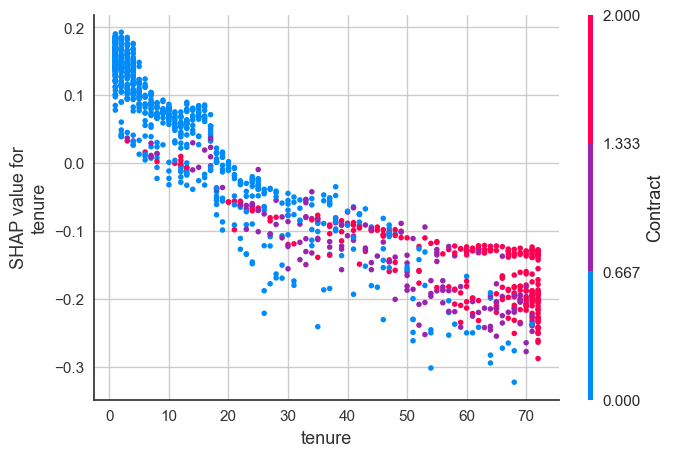

In [33]:
shap.dependence_plot("tenure", shap_values.values[:,:,1], X_test, interaction_index="Contract")
#Mostra o impacto marginal de uma variável, colorido por outra variável correlacionada.

### b) LIME

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['0','1'], mode='classification')


# Escolher uma instância X_test.iloc[i] para explicar
exp = explainer.explain_instance(X_test.iloc[1].values, model.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True)

c:\Users\gabri\Miniconda3\envs\gvspace\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [35]:
print(exp.as_list())

[('tenure > 50.00', -0.21582349243920199), ('InternetService <= 0.00', -0.06915112259105834), ('TotalCharges > 2843.19', -0.05761016763228987), ('StreamingTV <= 0.00', -0.05360665163453986), ('0.00 < PaperlessBilling <= 1.00', 0.05352969712733263)]


### c) Permutation Feature Importance (Breiman, 2001)

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

importances = pd.DataFrame({
    "feature": X.columns,
    "importance_mean": result.importances_mean,
    "importance_std": result.importances_std
}).sort_values("importance_mean", ascending=False)

print(importances)

             feature  importance_mean  importance_std
4             tenure         0.118403        0.007292
14          Contract         0.049580        0.005381
18      TotalCharges         0.017647        0.002657
17    MonthlyCharges         0.014706        0.003388
7    InternetService         0.012773        0.002705
8     OnlineSecurity         0.007647        0.001781
16     PaymentMethod         0.004706        0.002099
11       TechSupport         0.002269        0.002348
15  PaperlessBilling         0.002185        0.002715
9       OnlineBackup         0.002017        0.001730
3         Dependents         0.001597        0.000877
0             gender         0.001597        0.001614
12       StreamingTV         0.000924        0.001477
10  DeviceProtection         0.000840        0.001302
1      SeniorCitizen         0.000420        0.000678
6      MultipleLines         0.000000        0.000840
5       PhoneService        -0.000168        0.000336
2            Partner        

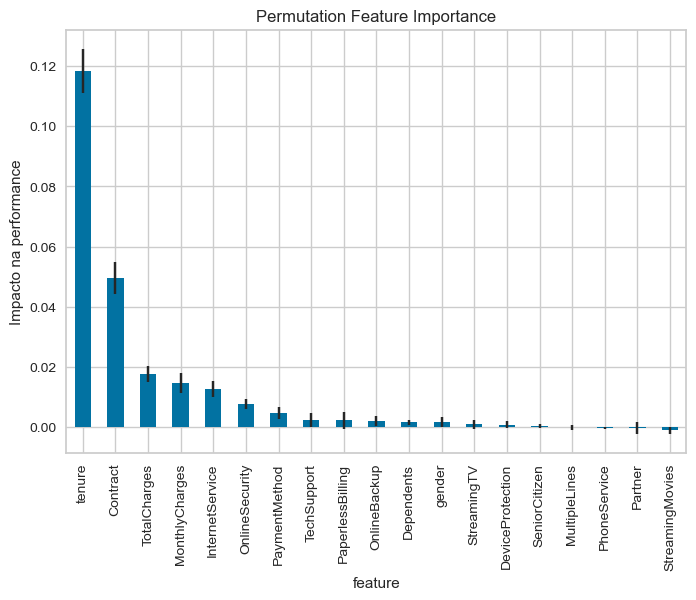

In [37]:
importances.plot.bar(x="feature", y="importance_mean", yerr="importance_std", legend=False)
plt.title("Permutation Feature Importance")
plt.ylabel("Impacto na performance")
plt.show()

### d) Partial Dependence Plots (PDP)

c:\Users\gabri\Miniconda3\envs\gvspace\lib\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column 4 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


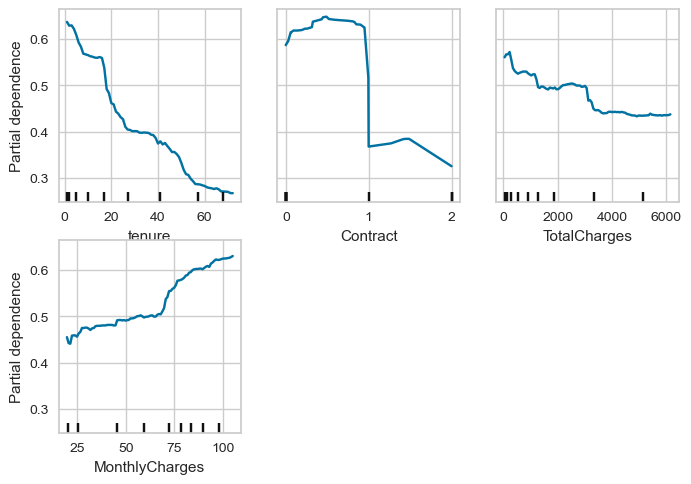

In [38]:
PartialDependenceDisplay.from_estimator(
    model, X_test, features=["tenure","Contract","TotalCharges","MonthlyCharges"], kind="average"
)

#Linha crescente → quanto maior a variável, maior a probabilidade prevista.
#Linha decrescente → efeito contrário.